In [1]:
import json
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [2]:
with open('results/model_math_performance.json', 'r') as f:
    model_math_performance = json.load(f)

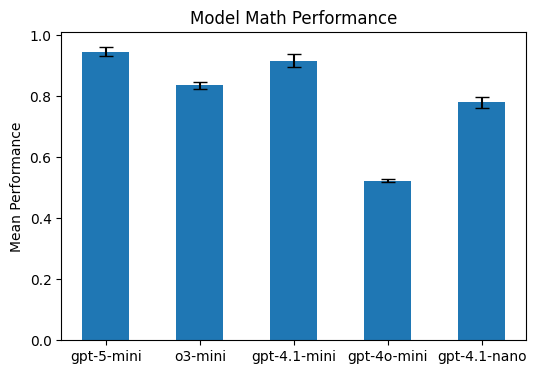

In [3]:
models = list(model_math_performance.keys())
means = [model_math_performance[m]['mean'] for m in models]
stds = [model_math_performance[m]['std'] for m in models]

plt.figure(figsize=(6, 4))
plt.bar(models, means, yerr=stds, capsize=5, width=0.5)
plt.ylabel('Mean Performance')
plt.title('Model Math Performance')
plt.show()

In [4]:
cross_data = pd.read_csv('results/cross_model_math_pgr.csv', index_col=0)
cross_data

,weak_model,strong_model,mean_pgr,std_pgr
0,gpt-4.1-mini,gpt-5-mini,1.000000,0.000000
1,o3-mini,gpt-5-mini,0.888889,0.157135
2,gpt-4.1-nano,gpt-5-mini,0.925926,0.104757
3,gpt-4o-mini,gpt-5-mini,0.966667,0.047140
4,o3-mini,gpt-4.1-mini,0.866667,0.188562
5,gpt-4.1-nano,gpt-4.1-mini,1.000000,0.000000
6,gpt-4o-mini,gpt-4.1-mini,0.964912,0.049622
7,gpt-4.1-nano,o3-mini,0.755556,0.174978
8,gpt-4o-mini,o3-mini,0.871795,0.181309
9,gpt-4o-mini,gpt-4.1-nano,0.974359,0.036262


In [5]:
pivot = cross_data.pivot_table(index='strong_model', columns='weak_model', values='mean_pgr')
pivot = pivot.loc[['gpt-5-mini', 'gpt-4.1-mini', 'o3-mini', 'gpt-4.1-nano']]

In [14]:
pivot_pm = cross_data.pivot_table(
    index='strong_model',
    columns='weak_model',
    values=['mean_pgr', 'std_pgr']
)

# Combine mean and std into "mean ± std" string
pivot_pm_str = pivot_pm['mean_pgr'].round(3).astype(str) + ' ± ' + pivot_pm['std_pgr'].round(3).astype(str)
pivot_pm_str = pivot_pm_str.loc[['gpt-5-mini', 'gpt-4.1-mini', 'o3-mini', 'gpt-4.1-nano']]
pivot_pm_str = pivot_pm_str.loc[:,['gpt-4.1-mini', 'o3-mini', 'gpt-4.1-nano', 'gpt-4o-mini']]
pivot_pm_str.replace('nan ± nan', 'N/A', inplace=True)
pivot_pm_str

weak_model,gpt-4.1-mini,o3-mini,gpt-4.1-nano,gpt-4o-mini
strong_model,,,,
gpt-5-mini,1.0 ± 0.0,0.889 ± 0.157,0.926 ± 0.105,0.967 ± 0.047
gpt-4.1-mini,N/A,0.867 ± 0.189,1.0 ± 0.0,0.965 ± 0.05
o3-mini,N/A,N/A,0.756 ± 0.175,0.872 ± 0.181
gpt-4.1-nano,N/A,N/A,N/A,0.974 ± 0.036


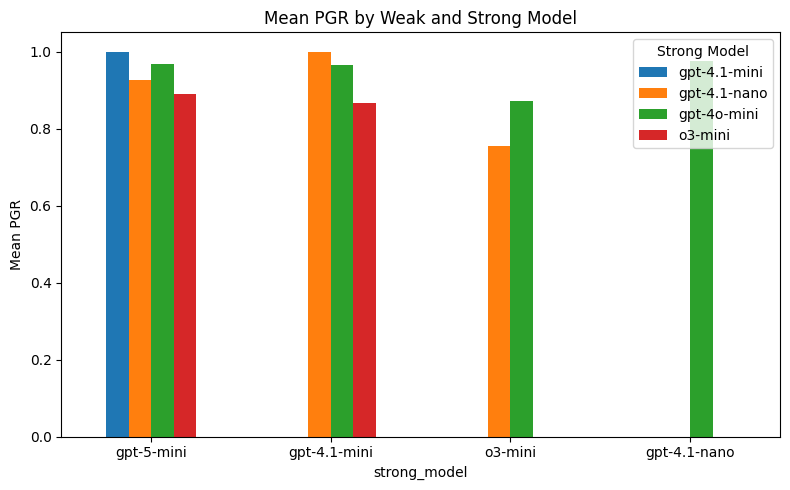

In [6]:
pivot.plot(kind='bar', figsize=(8, 5))
plt.ylabel('Mean PGR')
plt.title('Mean PGR by Weak and Strong Model')
plt.legend(title='Strong Model')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

In [7]:
with open('results/few_shot_performance.json', 'r') as f:
    few_shot_data = json.load(f)

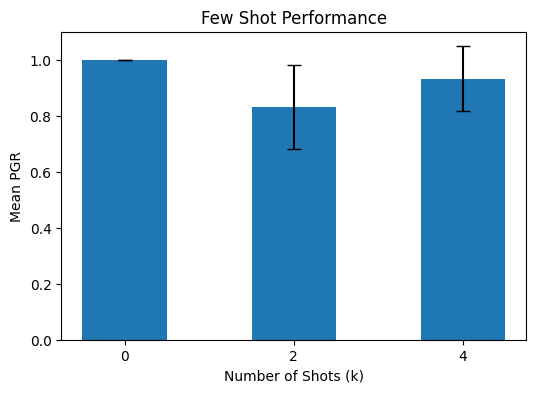

In [16]:
plt.figure(figsize=(6, 4))
keys = list(few_shot_data.keys())
means = [few_shot_data[k]['mean'] for k in keys]
stds = [few_shot_data[k]['std'] for k in keys]
plt.bar(keys, means, yerr=stds, capsize=5, width=0.5)
plt.ylabel('Mean PGR')
plt.xlabel('Number of Shots (k)')
plt.title('Few Shot Performance')
plt.show()